In [49]:
import pandas as pd
import plotly.express as px
from datetime import datetime, date
import ipywidgets as widgets
from IPython.display import display, clear_output
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('/content/datos_con_analisis_sentimiento.csv')
df.info()

/tmp/ipython-input-4-1876094753.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/datos_con_analisis_sentimiento.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220454 entries, 0 to 220453
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_name          220453 non-null  object 
 1   user_location      220454 non-null  object 
 2   user_description   216361 non-null  object 
 3   user_created       220454 non-null  object 
 4   user_followers     220454 non-null  float64
 5   user_friends       220454 non-null  float64
 6   user_favourites    220454 non-null  float64
 7   user_verified      220454 non-null  bool   
 8   date               220454 non-null  object 
 9   text               220454 non-null  object 
 10  hashtags           184285 non-null  object 
 11  source             220448 non-null  object 
 12  is_retweet         220452 non-null  object 
 13  diff_dias          220454 non-null  int64  
 14  texto_nuevo        220454 non-null  object 
 15  sentimiento        220454 non-null  object 
 16  se

In [6]:
def parsear_fechas(df, columna):
    fechas = []
    formatos = [
    "%d-%m-%Y %H:%M",        # 26-06-2025 15:30
    "%d/%m/%Y %H:%M",        # 26/06/2025 15:30
    "%Y-%m-%d %H:%M:%S",     # 2025-06-26 15:30:00
    "%Y/%m/%d %H:%M:%S",     # 2025/06/26 15:30:00
    "%d-%m-%Y %H:%M:%S",     # 26-06-2025 15:30:00
    "%d/%m/%Y %H:%M:%S",     # 26/06/2025 15:30:00
    "%Y-%m-%d %H:%M",        # 2025-06-26 15:30
    "%Y/%m/%d %H:%M",        # 2025/06/26 15:30
    "%d-%m-%Y",              # 26-06-2025
    "%d/%m/%Y",              # 26/06/2025
    "%Y-%m-%d",              # 2025-06-26
    "%Y/%m/%d",              # 2025/06/26
    "%m/%d/%Y %H:%M",        # 06/26/2025 15:30 (formato americano)
    "%m-%d-%Y %H:%M",        # 06-26-2025 15:30 (formato americano)
    "%m/%d/%Y",              # 06/26/2025
    "%m-%d-%Y",              # 06-26-2025
    "%Y.%m.%d",              # 2025.06.26
    "%Y.%m.%d %H:%M",        # 2025.06.26 15:30
    "%Y%m%d",                # 20250626 (formato compacto)
    "%Y%m%d%H%M%S",          # 20250626153000 (timestamp completo sin separadores)
    ]

    for registro in df[columna]:
        fecha_convertida = pd.NaT
        for formato in formatos:
            try:
                fecha_convertida = datetime.strptime(str(registro).strip(), formato)
                break  # salir si se convierte exitosamente
            except (ValueError, TypeError):
                continue
        fechas.append(fecha_convertida)

    df[columna] = fechas
    return df

In [7]:
df = parsear_fechas(df, "date")
original_len = len(df)

In [8]:
print("El número de registros con valores nulos en la columna date son: ", df["date"].isna().sum())
df = df.dropna(subset="date")

print("El número de registros con valores nulos en la columna date son: ", df["date"].isna().sum())
print(f"Se eliminaron {original_len - len(df)} filas con NaN en 'date'")

El número de registros con valores nulos en la columna date son:  0
El número de registros con valores nulos en la columna date son:  0
Se eliminaron 0 filas con NaN en 'date'


In [9]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,diff_dias,texto_nuevo,sentimiento,sentimiento_score,pais,codigo_pais,continente
0,mumbaikar 2.0,Home,"*here for the updates, memes and puns *",2012-06-11 14:29:00,188.0,146.0,2824.0,False,2020-08-11 17:39:00,Russia announces #CovidVaccine \nOther countri...,['CovidVaccine'],Twitter for Android,False,2983,russia announces covidvaccine other countries:,Neutral,-0.031097,Zimbabwe,ZWE,África
1,Dobs™,back of your mind,He suffers from Ben Button disease. He reached...,2009-11-06 12:37:00,594.0,331.0,1234.0,False,2020-09-09 11:03:00,#DobsRidiculosity Trump will probably whip up ...,"['DobsRidiculosity', 'Astrazeneca', 'vaccine',...",Twitter for Android,False,3959,dobsridiculosity trump will probably whip up a...,Negativo,-0.550781,Zimbabwe,ZWE,África
2,TimWould.,Home,"I thought they said beat out to help out, and ...",2013-02-19 08:49:00,696.0,579.0,16934.0,False,2020-09-08 19:04:00,CEO's issue safety pledge 😂\n#CovidVaccine,['CovidVaccine'],Twitter Web App,False,2758,ceo's issue safety pledge covidvaccine,Neutral,0.141113,Zimbabwe,ZWE,África
3,Ragnorakishere,Merseyside,QARANC Veteran. Everton FC Thoughts are my own...,2017-02-01 12:24:00,1551.0,1794.0,15150.0,False,2020-09-04 07:34:00,https://t.co/QeAOuJd27L Consider the pitfalls ...,['UBI'],Twitter Web App,False,1310,consider the pitfalls of ubi it irrevocably su...,Negativo,-0.513809,Zimbabwe,ZWE,África
4,We All Need A Helping Hand,MA.,"Livinlaughin&learnin to love.Found objects,pun...",2016-06-27 23:43:00,2986.0,4833.0,83222.0,False,2020-09-16 02:23:00,the woman asked trump about #immigrationreform...,"['immigrationreform', 'CovidVaccine']",Twitter for Android,False,1541,the woman asked trump about immigrationreform ...,Negativo,-0.757454,Zimbabwe,ZWE,África


In [17]:
df['año'] = df['date'].dt.year
df['mes'] = df['date'].dt.month

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220454 entries, 0 to 220453
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   user_name          220453 non-null  object        
 1   user_location      220454 non-null  object        
 2   user_description   216361 non-null  object        
 3   user_created       220454 non-null  object        
 4   user_followers     220454 non-null  float64       
 5   user_friends       220454 non-null  float64       
 6   user_favourites    220454 non-null  float64       
 7   user_verified      220454 non-null  bool          
 8   date               220454 non-null  datetime64[ns]
 9   text               220454 non-null  object        
 10  hashtags           184285 non-null  object        
 11  source             220448 non-null  object        
 12  is_retweet         220452 non-null  object        
 13  diff_dias          220454 non-null  int64   

In [19]:
df_filtered = df[(df['date'].dt.year >= 2020) & (df['date'].dt.year <= 2022)]
df_filtered['year_month'] = df_filtered['date'].dt.to_period('M')

df_filtered.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,diff_dias,texto_nuevo,sentimiento,sentimiento_score,pais,codigo_pais,continente,año,mes,year_month
0,mumbaikar 2.0,Home,"*here for the updates, memes and puns *",2012-06-11 14:29:00,188.0,146.0,2824.0,False,2020-08-11 17:39:00,Russia announces #CovidVaccine \nOther countri...,...,2983,russia announces covidvaccine other countries:,Neutral,-0.031097,Zimbabwe,ZWE,África,2020,8,2020-08
1,Dobs™,back of your mind,He suffers from Ben Button disease. He reached...,2009-11-06 12:37:00,594.0,331.0,1234.0,False,2020-09-09 11:03:00,#DobsRidiculosity Trump will probably whip up ...,...,3959,dobsridiculosity trump will probably whip up a...,Negativo,-0.550781,Zimbabwe,ZWE,África,2020,9,2020-09
2,TimWould.,Home,"I thought they said beat out to help out, and ...",2013-02-19 08:49:00,696.0,579.0,16934.0,False,2020-09-08 19:04:00,CEO's issue safety pledge 😂\n#CovidVaccine,...,2758,ceo's issue safety pledge covidvaccine,Neutral,0.141113,Zimbabwe,ZWE,África,2020,9,2020-09
3,Ragnorakishere,Merseyside,QARANC Veteran. Everton FC Thoughts are my own...,2017-02-01 12:24:00,1551.0,1794.0,15150.0,False,2020-09-04 07:34:00,https://t.co/QeAOuJd27L Consider the pitfalls ...,...,1310,consider the pitfalls of ubi it irrevocably su...,Negativo,-0.513809,Zimbabwe,ZWE,África,2020,9,2020-09
4,We All Need A Helping Hand,MA.,"Livinlaughin&learnin to love.Found objects,pun...",2016-06-27 23:43:00,2986.0,4833.0,83222.0,False,2020-09-16 02:23:00,the woman asked trump about #immigrationreform...,...,1541,the woman asked trump about immigrationreform ...,Negativo,-0.757454,Zimbabwe,ZWE,África,2020,9,2020-09


In [25]:
option = "País"

rc = [-1, 1]
custom_scale = [
    (0.0, "darkred"),
    (0.2, "red"),
    (0.25, "orangered"),
    (0.40, "orange"),
    (0.5, "yellow"),
    (0.60, "yellowgreen"),
    (0.75, "limegreen"),
    (0.8, "green"),
    (1.0, "darkgreen")
]

if option == "País":
    df_avg = df_filtered.groupby(['year_month', 'pais'], as_index=False)['sentimiento_score'].mean().round(2)
    df_avg['year_month_str'] = " " + df_avg['year_month'].astype(str)

    fig = px.choropleth(df_avg,
                        locations="pais",
                        color="sentimiento_score",
                        hover_name="pais",
                        animation_frame="year_month_str",
                        color_continuous_scale=custom_scale,
                        range_color=rc,
                        labels={"sentimiento_score": "Sentimiento", "year_month_str": "Fecha"},
                        title="Evolución Mensual del Sentimiento Promedio hacia las Vacunas\npor País (2020–2022)",
                        locationmode="country names")
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")

fig.show()


In [40]:
# Crear columnas de año, mes y año-mes como periodo
df['year_month'] = df['date'].dt.to_period('M')
df['year_month_str'] = df['year_month'].astype(str)


# Agrupar por mes y país, calculando el sentimiento promedio
df_avg = df.groupby(['year_month_str', 'pais'], as_index=False)['sentimiento_score'].mean()

# Obtener el top 5 de países con sentimiento más negativo por mes
top5_por_mes = df_avg.sort_values(['year_month_str', 'sentimiento_score']).groupby('year_month_str').head(5)

# Crear gráfico de barras animado
fig = px.bar(top5_por_mes,
             x='pais',
             y='sentimiento_score',
             color='sentimiento_score',
             color_continuous_scale=custom_scale,
             range_color=rc,
             animation_frame='year_month_str',
             title='Evolución Mensual del Top 5 Países con Sentimiento Promedio Más Negativo (2020–2022)',
             labels={'sentimiento_score': 'Sentimiento', 'pais': 'País'})

# Eje Y normal de abajo (−1) hacia arriba (0), con barras "hacia abajo"
fig.update_layout(
    xaxis_title='País',
    yaxis_title='Sentimiento Promedio',
    yaxis=dict(range=[-1, 0], dtick=0.25),  # No se invierte, pero se limita a negativos
)

fig.update_traces(width=0.4)

fig.show()

In [41]:
# Agrupar por mes y país, calculando el sentimiento promedio
df_avg = df.groupby(['year_month_str', 'pais'], as_index=False)['sentimiento_score'].mean()

# Obtener el top 5 de países con sentimiento más positivo por mes
top5_positivos = df_avg.sort_values(['year_month_str', 'sentimiento_score'], ascending=False).groupby('year_month_str').head(5)

# Crear gráfico de barras animado
fig = px.bar(top5_positivos,
             x='pais',
             y='sentimiento_score',
             color='sentimiento_score',
             color_continuous_scale=custom_scale,
             range_color=rc,
             animation_frame='year_month_str',
             title='Evolución Mensual del Top 5 Países con Sentimiento Promedio Más Positivo (2020–2022)',
             labels={'sentimiento_score': 'Sentimiento', 'pais': 'País'})

# Eje Y normal de 0 a 1 con barras hacia arriba
fig.update_layout(
    xaxis_title='País',
    yaxis_title='Sentimiento Promedio',
    yaxis=dict(range=[0, 1], dtick=0.25),
)

# Barras más delgadas
fig.update_traces(width=0.4)

fig.show()

In [47]:
# Obtener los 10 usuarios con más followers
top_usuarios = df.sort_values(by='user_followers', ascending=False).drop_duplicates(subset='user_name').head(10)

# Mostrar las columnas más relevantes
top_usuarios[['user_name', "user_description", 'user_followers', 'pais', 'user_verified', 'date', 'text', "sentimiento_score", "sentimiento"]]

,user_name,user_description,user_followers,pais,user_verified,date,text,sentimiento_score,sentimiento
181892,ABP News,Follow for latest news alerts from India,10984839.0,India,True,2021-03-25 04:09:52,#CovidVaccine Maker @adarpoonawalla Rents #Lon...,-0.111877,Neutral
188321,Saina Nehwal,Badminton player 🏸🏸..Olympic Bronze medallist ...,8505036.0,India,True,2021-07-10 12:47:22,COVID can be stopped - if you and I follow saf...,0.395660,Neutral
195252,Hindustan Times,One of India's largest media companies. Latest...,8471729.0,India,True,2022-04-15 16:22:44,The Delhi government announced that precaution...,0.272156,Neutral
191616,The Hindu,News feeds from India's National Newspaper,7288126.0,India,True,2021-10-25 21:00:14,Biological E. hopes to roll out COVID vaccine ...,0.137558,Neutral
195779,IndiaToday,"Brings you news breaks: Exclusive political, e...",6101862.0,India,True,2022-07-15 10:27:13,"To encourage people to take booster shots, the...",0.291130,Neutral
42707,Perez Hilton,This is the account for https://t.co/ytELUvMSd...,5706290.0,United States,True,2021-02-23 16:45:24,#MeghanMcCain suuuuuuuuucks for this one! #The...,-0.916904,Negativo
50104,American Red Cross,The official account of the American Red Cross.,5246836.0,United States,True,2021-03-23 19:05:03,Getting your #COVIDVaccine can help protect yo...,0.696358,Positivo
159075,PTI,Official twitter account of Pakistan Tehreek-e...,5222360.0,Pakistan,True,2021-02-15 06:35:02,Federal Minister and NCOC lead @Asad_Umar has ...,0.148727,Neutral
195820,Nirmala Sitharaman,Minister of Finance and Corporate Affairs. MP ...,5069720.0,India,True,2022-07-13 14:28:11,Appreciate the decision taken by @PMOIndia to ...,0.826862,Positivo
195739,News18,Official Twitter account of CNN-News18. Lightn...,4704703.0,India,True,2022-07-17 06:48:46,#BREAKING India is all set to cross 200 crore ...,0.182388,Neutral


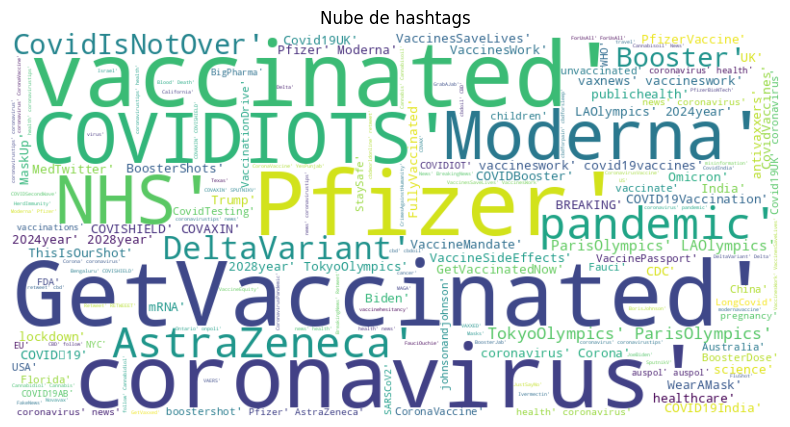

In [54]:
from wordcloud import WordCloud
import re

# Lista de patrones relacionados con COVID
covid_patterns = [
    r'#?covid[vv]?accine',
    r'#?covid[-_ ]?19',
    r'#?covid_19',
    r'#?covid19',
    r'#?covid',
    r'#?COVID',
    r'#?COVID[-_]?19',
    r'#?COVIDVACCINE',
    r'#?vaccine',
    r'#?vaccines',
    r'#?vaccination',
    r'#?covidvaccination',
    r"#?COVID19Vaccine",
]
# Unir los patrones en una sola expresión regular (ignora mayúsculas y minúsculas)
covid_regex = re.compile(r'\b(?:' + '|'.join(covid_patterns) + r')\b', flags=re.IGNORECASE)

# Combinar todos los hashtags en un solo texto
all_hashtags = df['hashtags'].dropna().str.cat(sep=' ')

# Eliminar los hashtags relacionados con COVID
filtered_hashtags = covid_regex.sub('', all_hashtags)

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white')\
            .generate(filtered_hashtags)

# Mostrar la nube
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de hashtags')
plt.show()

In [55]:
!pip install wordcloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

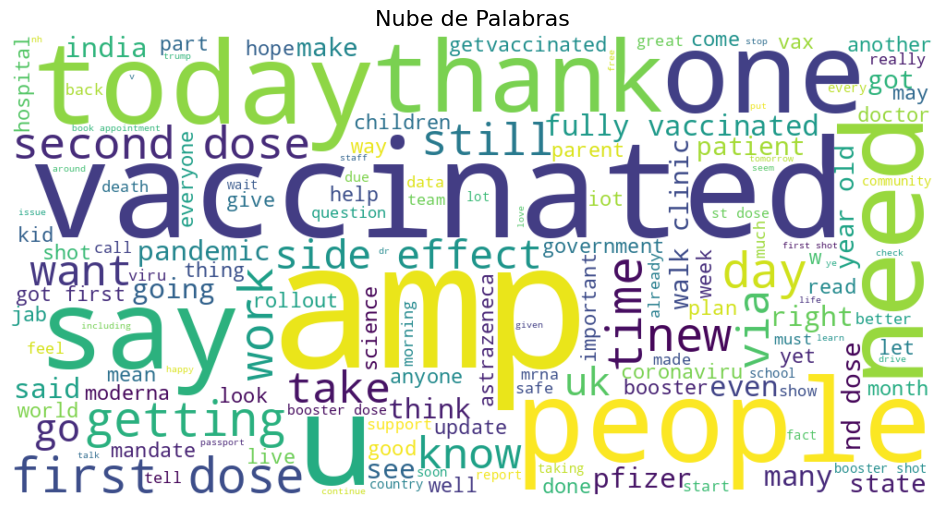

In [57]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re

english_stopwords = set(stopwords.words('english'))

covid_patterns = [
    r'#?covid[vv]?accine',
    r'#?covid[-_ ]?19',
    r'#?covid_19',
    r'#?covid19',
    r'#?covid',
    r'#?COVID',
    r'#?COVID[-_]?19',
    r'#?COVIDVACCINE',
    r'#?vaccine',
    r'#?vaccines',
    r'#?vaccination',
    r'#?covidvaccination',
    r'#?COVID19Vaccine',
]

covid_regex = re.compile("|".join(covid_patterns), re.IGNORECASE)


def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)               # URLs
    text = re.sub(r"@\w+", "", text)                  # Menciones
    text = re.sub(r"#\w+", "", text)                  # Hashtags
    text = covid_regex.sub("", text)                  # Palabras relacionadas a COVID/vacunas
    text = re.sub(r"[^a-z]+", " ", text)              # Solo letras
    tokens = text.split()
    tokens = [t for t in tokens if t not in english_stopwords]
    return " ".join(tokens)

all_text = (
    df['texto_nuevo']
    .dropna()
    .map(preprocess)
    .str.cat(sep=" ")
)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    max_words=150
).generate(all_text)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras', fontsize=16)
plt.show()

In [5]:
import plotly.graph_objects as go
import plotly.io as pio

# Para renderizar en Colab
pio.renderers.default = 'colab'

# Fecha a datetime, eliminando filas inválidas
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# Verifica que exista la columna 'sentimiento'
if 'sentimiento' not in df.columns:
    raise KeyError("La columna 'sentimiento' no está en df_filtrado")

def compute_pct_aggs(df):
    result = {}
    for freq, label in [('D','Diario'), ('M','Mensual'), ('Y','Anual')]:
        agg = (
            df
            .groupby([pd.Grouper(key='date', freq=freq), 'sentimiento'])
            .size()
            .reset_index(name='conteo')
        )
        pivot = agg.pivot(index='date', columns='sentimiento', values='conteo').fillna(0)
        totals = pivot.sum(axis=1)
        pct = pivot.div(totals, axis=0) * 100

        df_pct = pct.reset_index().melt(
            id_vars='date',
            var_name='sentimiento',
            value_name='pct'
        ).sort_values('date')
        result[label] = df_pct
    return result

aggs_pct = compute_pct_aggs(df)
sentimientos = df['sentimiento'].unique()

fig = go.Figure()

# Trazas iniciales: Diario
for s in sentimientos:
    subset = aggs_pct['Diario'][aggs_pct['Diario']['sentimiento'] == s]
    fig.add_trace(go.Scatter(
        x=subset['date'],
        y=subset['pct'],
        mode='lines+markers',
        name=s,
        hovertemplate='%{x|%Y-%m-%d}<br>%{y:.1f}% de tweets<extra></extra>'
    ))

buttons = []
for label, df_pct in aggs_pct.items():
    x_lists = [df_pct[df_pct['sentimiento']==s]['date'] for s in sentimientos]
    y_lists = [df_pct[df_pct['sentimiento']==s]['pct']  for s in sentimientos]
    buttons.append(dict(
        label=label,
        method='update',
        args=[
            {'x': x_lists, 'y': y_lists},
            {'title': f"Evolución porcentual del sentimiento ({label})"}
        ]
    ))

fig.update_layout(
    title="Evolución porcentual del sentimiento (Diario)",
    xaxis=dict(
        title='Fecha',
        rangeselector=dict(
            buttons=[
                dict(count=1,  label="1 mes",   step="month", stepmode="backward"),
                dict(count=3,  label="3 meses", step="month", stepmode="backward"),
                dict(count=6,  label="6 meses", step="month", stepmode="backward"),
                dict(count=1,  label="1 año",   step="year",  stepmode="backward"),
                dict(step="all", label="Todo")
            ]
        ),
        rangeslider=dict(visible=True),
        tickformat="%b\n%Y"
    ),
    yaxis=dict(
        title='Porcentaje de tweets',
        ticksuffix=" %",
        range=[0, 100]
    ),
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.1, xanchor="left",
        y=1.15, yanchor="top"
    )],
    legend_title="Sentimiento",
    hovermode="x unified",
    margin=dict(t=100, b=50, l=50, r=50)
)

fig.show()
